In [104]:
# import data in a pandas data frame

import pandas as pd
raw_dataframe = pd.read_csv("Cellphone.csv")

In [105]:
print(raw_dataframe.head())

   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


In [106]:
raw_dataframe = raw_dataframe.drop('Product_id', axis = 1)
for columns in raw_dataframe.columns:
    print(columns)

Price
Sale
weight
resoloution
ppi
cpu core
cpu freq
internal mem
ram
RearCam
Front_Cam
battery
thickness


In [107]:
print(raw_dataframe.shape)

(161, 13)


In [108]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(raw_dataframe, train_size=0.70, random_state=150)

train['source'] = 'train'
test['source'] = 'test'
train.columns

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness',
       'source'],
      dtype='object')

In [109]:
df = pd.concat([train, test], axis=0)

In [110]:
# Univariate Analysis: Missing value imputation
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
source          0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 98 to 41
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
 13  source        161 non-null    object 
dtypes: float64(8), int64(5), object(1)
memory usage: 18.9+ KB


In [112]:
# NO MISSING VALUES

<AxesSubplot:>

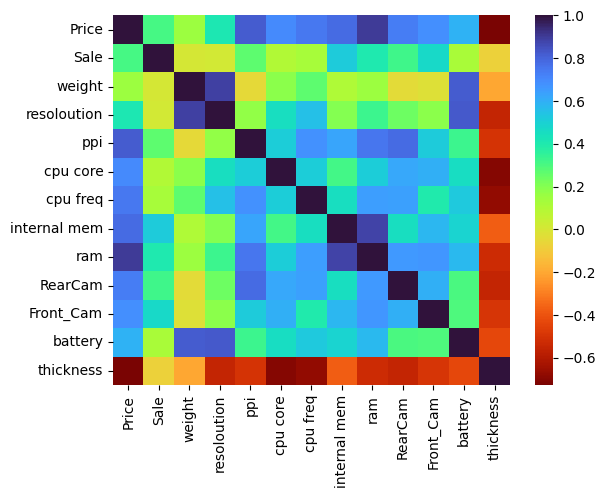

In [113]:
# Bivariate Analysis Continuous Variables: Scatterplot
corr = df[df['source'] == 'train'].corr()
import seaborn as sns

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='turbo_r')

In [114]:
from statsmodels.api import add_constant
print(df.shape)
df = add_constant(df)
print(df.shape)

(161, 14)
(161, 15)


In [115]:
train = df[df['source'] == 'train']
test = df[df['source'] == 'test']

In [116]:
train = train.drop('source', axis=1)
test = test.drop('source', axis=1)

In [117]:
train_x = train.drop('Price', axis=1)
train_y = train['Price']

In [118]:
test_x = test.drop('Price', axis=1)
test_y = test['Price']

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

temp_max_vif = 100
max_vif = 3
train_x_cpy = train_x.copy()
counter = 0
high_vif_columns_names = []

while temp_max_vif >= max_vif:
    counter+=1
    
    temp_vif = pd.DataFrame()
    
    temp_vif['vif'] = [variance_inflation_factor(train_x_cpy.values, i) for i in range(len(train_x_cpy.columns))]
    
    temp_vif['column_name'] = train_x_cpy.columns
    
    temp_vif.dropna(inplace=True)
    
    temp_column_name = temp_vif.sort_values(['vif'], ascending=False).iloc[0, 1]

    temp_max_vif = temp_vif.sort_values(['vif'], ascending=False).iloc[0, 0]
    
    print(temp_column_name)
    
    if temp_max_vif >= max_vif:
        train_x_cpy = train_x_cpy.drop(temp_column_name, axis=1)
        high_vif_columns_names.append(temp_column_name)
# const is the intercept
# print(high_vif_columns_names)
if 'const' in high_vif_columns_names:
    high_vif_columns_names.remove('const') 
train_x = train_x.drop(high_vif_columns_names, axis=1)
test_x = test_x.drop(high_vif_columns_names, axis=1)

const
Front_Cam


In [150]:
from statsmodels.api import OLS
model = OLS(train_y, train_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     162.7
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.55e-44
Time:                        20:23:50   Log-Likelihood:                -795.91
No. Observations:                 112   AIC:                             1602.
Df Residuals:                     107   BIC:                             1615.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3082.0481    167.726     18.376   

In [136]:
model.pvalues

const           7.035811e-35
Sale            1.129242e-02
internal mem    5.088429e-21
Front_Cam       1.052030e-04
thickness       2.646326e-16
dtype: float64

In [137]:
test_pred = model.predict(test_x)
print(test_pred[0:6])
print(test_y[:6])

63     2714.540388
53     3174.064051
76     2713.022308
60     2415.923092
117    2788.800759
72     2140.231908
dtype: float64
63     2323
53     3658
76     2571
60     2824
117    3287
72     2044
Name: Price, dtype: int64


In [138]:
import numpy as np

np.sqrt(np.mean((test_y - test_pred)**2))

323.58854691313144